In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
n = 50

x0 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],size=[n])
x1 = np.random.randint(0,100,size=[n])*2.0*np.pi/100.0
x1 = 4.0*np.transpose([np.sin(x1),np.cos(x1)])

y0 = np.zeros([n])
y1 = np.ones([n])

data = np.concatenate((x0,x1))
labels = np.concatenate((y0,y1))

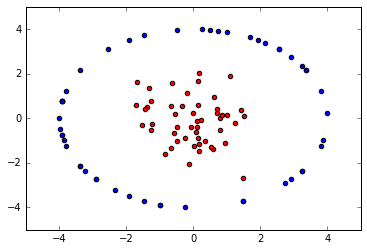

In [169]:
plt.scatter(data[labels==0][:,0],data[labels==0][:,1],c="r")
plt.scatter(data[labels==1][:,0],data[labels==1][:,1],c="b")
plt.show()

In [170]:
indices = np.random.binomial(1,0.5,size=[len(data)])

tr_data = data[indices==1]
ts_data = data[indices==0]
tr_labels = labels[indices==1]
ts_labels = labels[indices==0]

In [171]:
print(len(tr_data))
print(len(ts_data))

52
48


In [172]:
x = tf.placeholder(tf.float32,[None,2])
y = tf.placeholder(tf.float32,[None])

W1 = tf.Variable(tf.random_normal([2,5],stddev=0.1))
b1 = tf.Variable(tf.random_normal([5]))

W2 = tf.Variable(tf.random_normal([5,5],stddev=0.1))
b2 = tf.Variable(tf.random_normal([5]))

W3 = tf.Variable(tf.random_normal([5,1],stddev=0.1))
b3 = tf.Variable(tf.random_normal([1]))

x1 = tf.matmul(x,W1)+b1
x2 = tf.matmul(tf.nn.tanh(x1),W2)+b2
x3 = tf.matmul(tf.nn.tanh(x2),W3)+b3

output = tf.nn.sigmoid(x3)

y_ = tf.reshape(y,[-1,1])
loss = -tf.reduce_mean(y_*tf.log(output) + (1-y_)*tf.log(1-output))

train_op = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

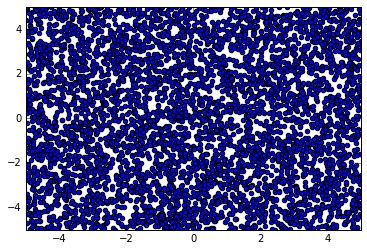

In [173]:
vis_data = np.transpose([np.random.uniform(-1.0,1.0,size=[5000])*5.0,np.random.uniform(-1.0,1.0,size=[5000])*5.0])
plt.scatter(vis_data[:,0],vis_data[:,1])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [174]:
tr_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

LOSS : 0.6966499
0.46153846153846156


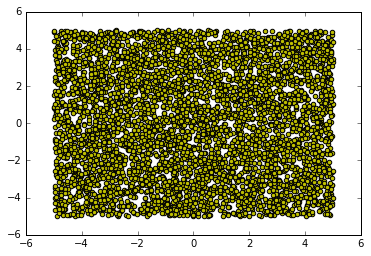

LOSS : 0.50391495
0.7692307692307693


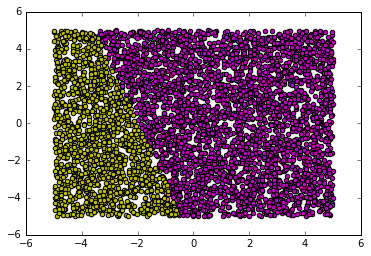

LOSS : 0.36717924
0.9038461538461539


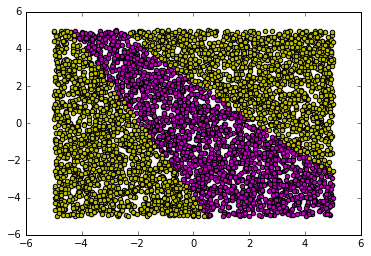

LOSS : 0.28577507
0.9038461538461539


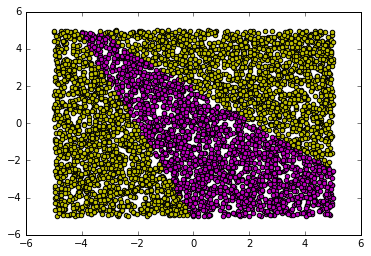

LOSS : 0.25095356
0.9230769230769231


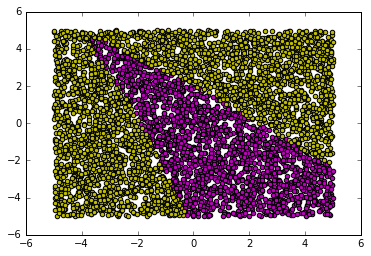

LOSS : 0.21000177
0.9423076923076923


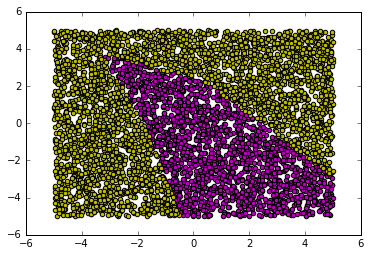

LOSS : 0.13611053
0.9807692307692307


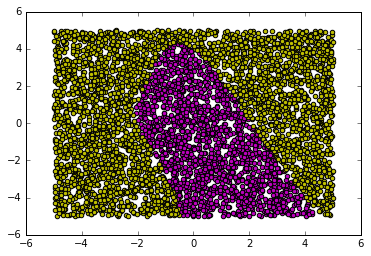

LOSS : 0.10003023
0.9807692307692307


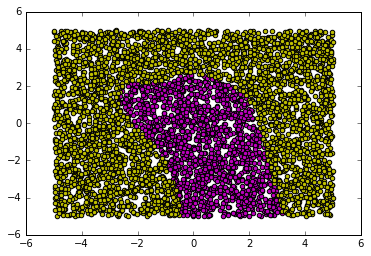

LOSS : 0.09498306
0.9807692307692307


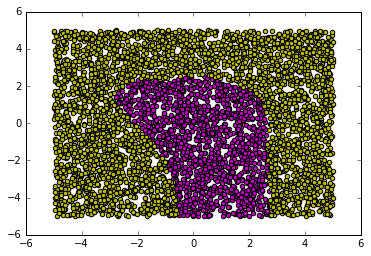

LOSS : 0.09115096
0.9807692307692307


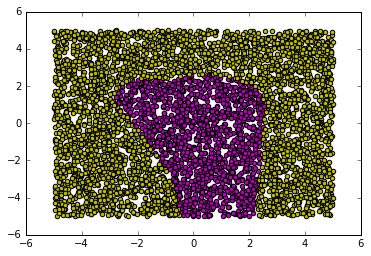

In [175]:
num_iter = 100

for i in range(num_iter):
    
    sess.run(train_op,feed_dict={x:tr_data,y:tr_labels})
    
    if i % (num_iter/10) == 0:

        print("LOSS : " + str(sess.run(loss,feed_dict={x:tr_data,y:tr_labels})))
        tr_preds = np.reshape(sess.run(output,feed_dict={x:tr_data}),[-1])
        ts_preds = np.reshape(sess.run(output,feed_dict={x:ts_data}),[-1])

        tr_acc = np.mean(np.equal(tr_preds>0.5,tr_labels>0.5))
        print(tr_acc)
    
        vis_preds = sess.run(output,feed_dict={x:vis_data})
        vis_preds = np.where(np.reshape(vis_preds,[-1])>0.5,1,0)
        plt.scatter(vis_data[vis_preds==0][:,0],vis_data[vis_preds==0][:,1],c="m")
        plt.scatter(vis_data[vis_preds==1][:,0],vis_data[vis_preds==1][:,1],c="y")
        plt.show()

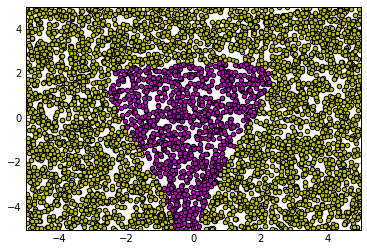

In [176]:
vis_preds = sess.run(output,feed_dict={x:vis_data})
vis_preds = np.where(np.reshape(vis_preds,[-1])>0.5,1,0)
plt.scatter(vis_data[vis_preds==0][:,0],vis_data[vis_preds==0][:,1],c="m")
plt.scatter(vis_data[vis_preds==1][:,0],vis_data[vis_preds==1][:,1],c="y")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

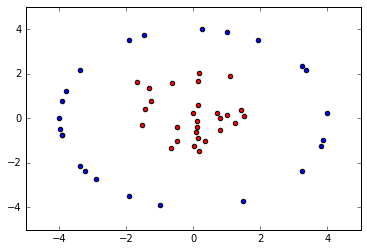

In [177]:
plt.scatter(tr_data[tr_labels==0][:,0],tr_data[tr_labels==0][:,1],c="r")
plt.scatter(tr_data[tr_labels==1][:,0],tr_data[tr_labels==1][:,1],c="b")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

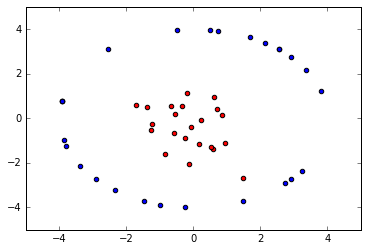

In [178]:
plt.scatter(ts_data[ts_labels==0][:,0],ts_data[ts_labels==0][:,1],c="r")
plt.scatter(ts_data[ts_labels==1][:,0],ts_data[ts_labels==1][:,1],c="b")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [179]:
ts_acc = np.mean(np.equal(ts_preds>0.5,ts_labels>0.5))
print(ts_acc)

0.9583333333333334


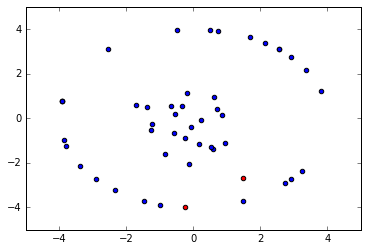

In [180]:
preds = np.reshape(sess.run(output,feed_dict={x:ts_data}),[-1])
preds = np.where(preds>0.5,1,0)

plt.scatter(ts_data[preds==ts_labels][:,0],ts_data[preds==ts_labels][:,1],c="b")
plt.scatter(ts_data[preds!=ts_labels][:,0],ts_data[preds!=ts_labels][:,1],c="r")
plt.show()

In [181]:
wrong_preds = ts_data[preds!=ts_labels]

In [182]:
wrong_preds

array([[ 1.47641915, -2.68788912],
       [-0.25116208, -3.99210691]])

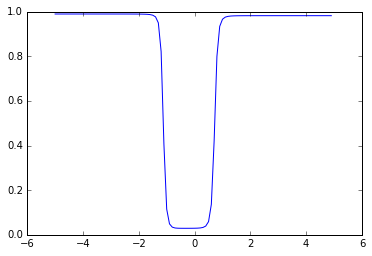

In [189]:
outputs = []
testrange = np.arange(-5.0,5.0,0.1)
for x_ in testrange:
    output_ = sess.run(output,feed_dict={x:[[x_,wrong_preds[0][1]]]})[0]
    outputs.append(output_)
    
plt.plot(testrange,outputs)
plt.show()

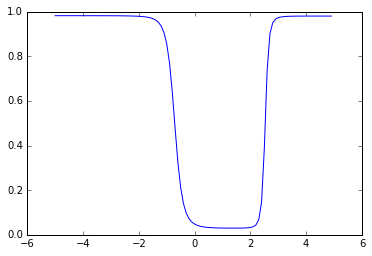

In [190]:
outputs = []
testrange = np.arange(-5.0,5.0,0.1)
for y_ in testrange:
    output_ = sess.run(output,feed_dict={x:[[wrong_preds[0][0],y_]]})[0]
    outputs.append(output_)
    
plt.plot(testrange,outputs)
plt.show()

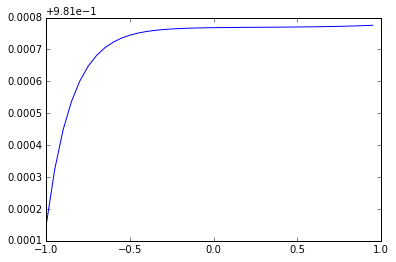

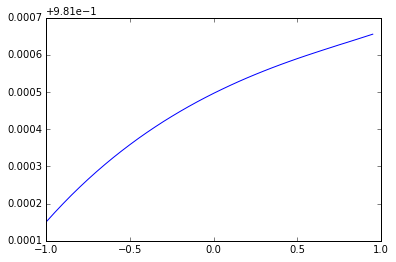

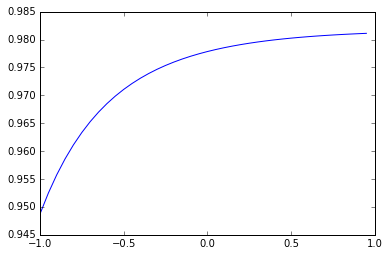

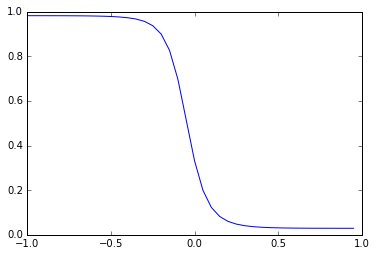

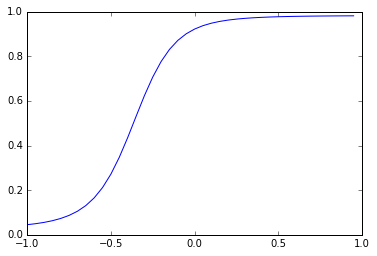

In [200]:
for i in range(5):
    outputs = []
    testrange = np.arange(-1.0,1.0,0.05)
    for x1_i in testrange:
        x1_ = sess.run(tf.nn.tanh(x1),feed_dict={x:[wrong_preds[0]]})
        x1_[0][i] = x1_i
        output_ = sess.run(tf.nn.sigmoid(tf.matmul(tf.nn.tanh(tf.matmul(x1_,W2)+b2),W3)+b3))
        outputs.append(output_)
    plt.plot(testrange,np.reshape(outputs,[-1]))
    plt.show()

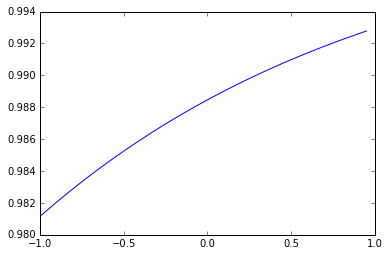

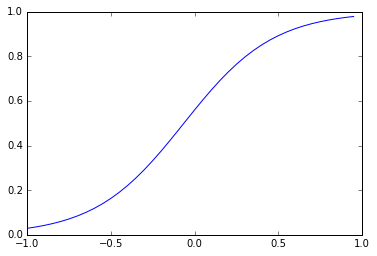

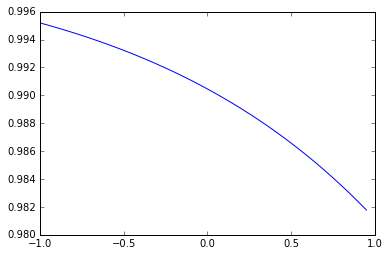

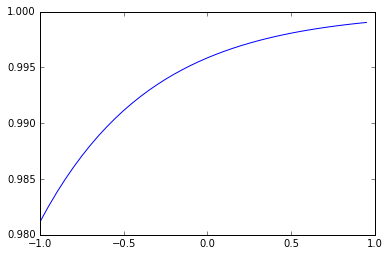

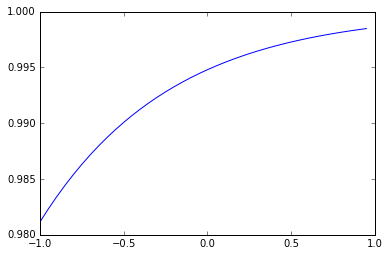

In [201]:
for i in range(5):
    outputs = []
    testrange = np.arange(-1.0,1.0,0.05)
    for x2_i in testrange:
        x2_ = sess.run(tf.nn.tanh(x2),feed_dict={x:[wrong_preds[0]]})
        x2_[0][i] = x2_i
        output_ = sess.run(tf.nn.sigmoid(tf.matmul(x2_,W3)+b3))
        outputs.append(output_)
    plt.plot(testrange,np.reshape(outputs,[-1]))
    plt.show()

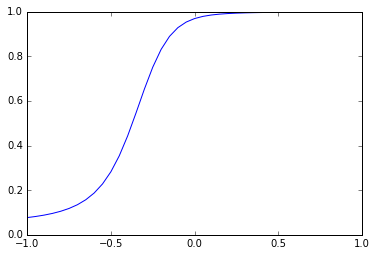

In [197]:
plt.plot(testrange,np.reshape(outputs,[-1]))
plt.show()

In [203]:
sess.run(tf.gradients(output,x),feed_dict={x:wrong_preds})

[array([[ 0.00287105, -0.00108092],
        [ 0.00104828, -0.00052148]], dtype=float32)]

In [204]:
wrong_preds

array([[ 1.47641915, -2.68788912],
       [-0.25116208, -3.99210691]])

In [205]:
sess.run(tf.gradients(output,x1),feed_dict={x:[wrong_preds[0]]})

[array([[ 8.6710417e-09,  8.3906343e-07,  2.1809106e-05, -2.6134253e-03,
          8.9310197e-05]], dtype=float32)]

In [207]:
sess.run(tf.nn.tanh(x1),feed_dict={x:[wrong_preds[0]]})

array([[-0.9999989 , -0.99917156,  0.990308  , -0.7068071 ,  0.98239386]],
      dtype=float32)

In [214]:
sess.run(tf.gradients(output,x2),feed_dict={x:[wrong_preds[0]]})

[array([[ 3.2944211e-08,  1.2496045e-03, -0.0000000e+00,  0.0000000e+00,
          8.5962100e-09]], dtype=float32)]

In [209]:
sess.run(tf.nn.tanh(x2),feed_dict={x:[wrong_preds[0]]})

array([[-0.9999982 ,  0.99094224,  1.        , -1.        , -0.9999998 ]],
      dtype=float32)

In [217]:
sess.run(tf.gradients(x3,tf.nn.tanh(x2)),feed_dict={x:[wrong_preds[1]]})

TypeError: Fetch argument None has invalid type <type 'NoneType'>

In [212]:
sess.run(W3)

array([[ 0.49812162],
       [ 3.7469687 ],
       [-0.6901261 ],
       [ 1.5291766 ],
       [ 1.2997605 ]], dtype=float32)

In [216]:
sess.run(tf.gradients(x3,x2),feed_dict={x:[wrong_preds[0]]})

[array([[ 1.7814217e-06,  6.7570977e-02, -0.0000000e+00,  0.0000000e+00,
          4.6483058e-07]], dtype=float32)]

In [218]:
x1 = tf.matmul(x,W1)+b1
x1_a = tf.nn.tanh(x1)
x2 = tf.matmul(x1_a,W2)+b2
x2_a = tf.nn.tanh(x2)
x3 = tf.matmul(x2_a,W3)+b3

output = tf.nn.sigmoid(x3)

In [219]:
print(sess.run(tf.gradients(x3,x2_a),feed_dict={x:[wrong_preds[0]]}))
print(sess.run(W3,feed_dict={x:[wrong_preds[0]]}))

[array([[ 0.49812162,  3.7469687 , -0.6901261 ,  1.5291766 ,  1.2997605 ]],
      dtype=float32)]
[[ 0.49812162]
 [ 3.7469687 ]
 [-0.6901261 ]
 [ 1.5291766 ]
 [ 1.2997605 ]]
